In [1]:
import os
# os.environ["CUDA_VISIBLE_DEVICES"] = "1"

# load dataset

In [2]:
import numpy as np
import pandas as pd
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

import matplotlib.pyplot as plt

Using TensorFlow backend.
f:\anaconda\envs\py37\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
f:\anaconda\envs\py37\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
f:\anaconda\envs\py37\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
f:\anaconda\envs\py37\lib\site-packages\tensorflow\python\framework\dtypes.py:529: Future

In [3]:
x_train = np.load('E:/IDS/alldata/12/RUS+SMOTE/label_2/data.npy')
y_train = np.load('E:/IDS/alldata/12/RUS+SMOTE/label_2/label.npy')

x_test = np.load('E:/IDS/alldata/12/test/data.npy')
y_test = np.load('E:/IDS/alldata/12/test/label_2.npy')

x_val = np.load('E:/IDS/alldata/12/val/data.npy')
y_val = np.load('E:/IDS/alldata/12/val/label_2.npy')


x_train=np.concatenate([x_train,x_val],axis=0)
y_train=np.concatenate([y_train,y_val],axis=0)

print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(2032035, 12) (2032035, 1) (508012, 12) (508012, 1)


# RF

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve
import time
# Create the model with 100 trees
RSEED = 50   
#binary-class
model = RandomForestClassifier(n_estimators=25,  #树的个数，即学习器的个数
                               random_state=RSEED,  #随机数生成器使用的种子
                               max_features = 'sqrt',  #最大特征数 默认是none，划分时考虑所有的特征
                               min_samples_split= 10,  #内部节点再划分所需最少的样本数
                               max_leaf_nodes= 38,#最大叶子节点数
                               max_depth=20,  #决策树的最大深度
                               bootstrap = False,
                               n_jobs=-1,  #用于并行提高效率，-1表示使用所有CPU，1表示不并行
                               verbose = 1)  #int，可选，默认：0。用于开启/关闭迭代中间输出日志功能。
time_start = time.time()

#multi-class
# model = RandomForestClassifier(n_estimators=157,  #树的个数，即学习器的个数
#                                random_state=RSEED,  #随机数生成器使用的种子
#                                max_features = 'auto',  #最大特征数 默认是none，划分时考虑所有的特征
#                                min_samples_split= 5,  #内部节点再划分所需最少的样本数
#                                max_leaf_nodes= 48,#最大叶子节点数
#                                max_depth=27,  #决策树的最大深度
#                                bootstrap = True,
#                                n_jobs=-1,  #用于并行提高效率，-1表示使用所有CPU，1表示不并行
#                                verbose = 1)  #int，可选，默认：0。用于开启/关闭迭代中间输出日志功能。
# time_start = time.time()


# Fit on training data
model.fit(x_train,y_train)

n_nodes = []
max_depths = []
for ind_tree in model.estimators_:
    n_nodes.append(ind_tree.tree_.node_count)
    max_depths.append(ind_tree.tree_.max_depth)
print(f'Average number of nodes {int(np.mean(n_nodes))}')
print(f'Average maximum depth {int(np.mean(max_depths))}')

time_end = time.time()
train_time = time_end - time_start
print("train_time:",train_time)

f:\anaconda\envs\py37\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


Average number of nodes 75
Average maximum depth 11
train_time: 9.511723756790161


[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    9.2s finished


# test

In [7]:
time_start_test = time.time()
y_pred  = model.predict(x_test)
y_pred =y_pred.reshape(y_pred.shape[0],1)
time_end_test = time.time()
test_time = time_end_test - time_start_test
print("test_time:",test_time)

y_true =y_test

np.savetxt("E:/IDS/alldata/12/RUS+SMOTE/label_2/RF_y_pred_RUS.txt",y_pred,fmt = '%s') 
np.savetxt("E:/IDS/alldata/12/RUS+SMOTE/label_2/RF_y_true_RUS.txt",y_true,fmt = '%s')  

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 out of  25 | elapsed:    0.0s finished


test_time: 0.23464751243591309


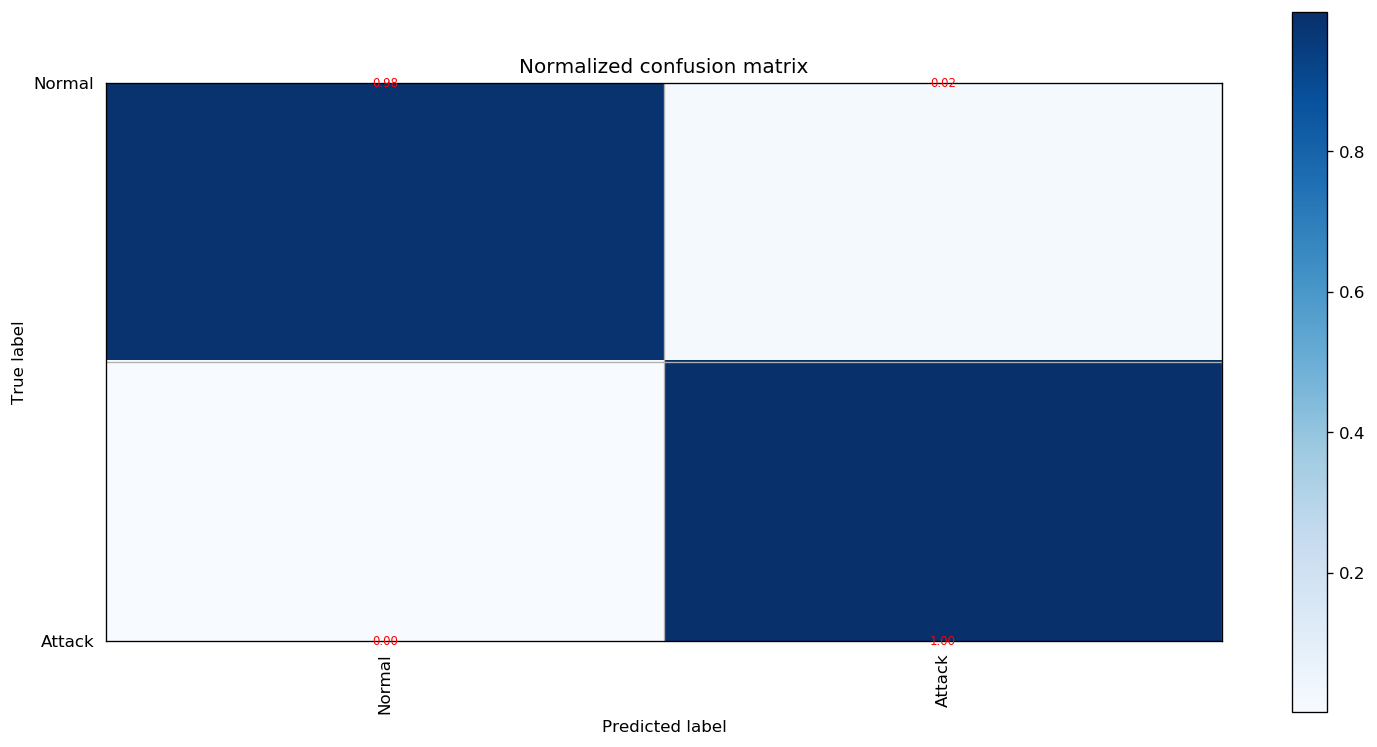

In [8]:
# -*-coding:utf-8-*-
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

#labels表示你不同类别的代号
# labels = ['Normal','Analysis','Backdoor','DoS','Exploits','Fuzzers','Generic','Reconnaissance','Shellcode','Worms']
labels = ['Normal','Attack']
          
y_true = y_true
y_pred  = y_pred  

tick_marks = np.array(range(len(labels))) + 0.5

def plot_confusion_matrix(cm, title='Confusion Matrix', cmap=plt.cm.binary):
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues) 
    plt.title(title)
    plt.colorbar()
    xlocations = np.array(range(len(labels)))
    plt.xticks(xlocations, labels, rotation=90)
    plt.yticks(xlocations, labels)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


cm = confusion_matrix(y_true, y_pred)  #Confusion matrix
np.set_printoptions(precision=2)  
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  

plt.figure(figsize=(15, 8), dpi=120)

ind_array = np.arange(len(labels))
x, y = np.meshgrid(ind_array, ind_array)

for x_val, y_val in zip(x.flatten(), y.flatten()):
    c = cm_normalized[y_val][x_val]
    if c > 0.001:
        plt.text(x_val, y_val, "%0.2f" % (c,), color='red', fontsize=7, va='center', ha='center')
# offset the tick
plt.gca().set_xticks(tick_marks, minor=True)
plt.gca().set_yticks(tick_marks, minor=True)
plt.gca().xaxis.set_ticks_position('none')
plt.gca().yaxis.set_ticks_position('none')
plt.grid(True, which='minor', linestyle='-')
plt.gcf().subplots_adjust(bottom=0.15)

plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')  
#plt.savefig('confusion_matrix.png', format='png')  
plt.show()


In [9]:
print(cm)  #Confusion matrix

[[437034   6721]
 [    82  64175]]


# # multi-class evaluation indicators

In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report

target_names = ['Normal','Analysis','Backdoor','DoS','Exploits','Fuzzers','Generic','Reconnaissance','Shellcode','Worms']
print(classification_report(y_true,y_pred,target_names=target_names))

In [ ]:
acc = metrics.accuracy_score(y_true,y_pred) 
f1 = metrics.f1_score(y_true, y_pred,average='weighted')
pre = metrics.precision_score(y_true, y_pred, labels=None, pos_label=1, average='weighted')  #DR
recall = metrics.recall_score(y_true, y_pred, labels=None, pos_label=1, average='weighted', sample_weight=None)

print("acc:",acc)
print("pre:",pre)
print("DR=recall:",recall)
print("f1:",f1)

# binary-class evaluation indicators

In [10]:
TP=cm[1,1]
FP=cm[0,1]
FN=cm[1,0]
TN=cm[0,0]

acc = (TP+TN)/(TP+TN+FP+FN)
print("acc:",acc)

DR = TP/(TP+FN)  
print("DR:",DR)

FPR = FP/(FP+TN)  #FAR
print("FPR:",FPR)

recall =TP/(TP+FN)
print("recall：",recall)  

precision = TP/(TP+FP)
print("precision:",precision)

f1 = (2*precision*recall)/(precision+recall)
print("f1:",f1)

acc: 0.9866085840491957
DR: 0.9987238744416951
FPR: 0.015145744836677896
recall： 0.9987238744416951
precision: 0.9051991649740465
f1: 0.9496644543591337


# Parameter tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
# Hyperparameter grid
param_grid = {
    'n_estimators': np.linspace(10, 200).astype(int),
    'max_depth': [None] + list(np.linspace(3, 30).astype(int)),
    'max_features': ['auto', 'sqrt', None],
#      'max_features': ['auto', 'sqrt', None] + list(np.arange(0.5, 1, 0.1)),
    'max_leaf_nodes': [None] + list(np.linspace(10, 50, 500).astype(int)),
    'min_samples_split': [2, 5, 10],
    'bootstrap': [True, False]
}
# Estimator for use in random search
estimator = RandomForestClassifier(random_state = RSEED)
# Create the random search model
rs = RandomizedSearchCV(estimator, param_grid, n_jobs = -1, 
                        scoring = 'neg_log_loss', cv = 3, 
                        n_iter = 10, 
                        verbose = 1, 
                        random_state=RSEED)  #neg_log_loss
# Fit 
rs.fit(x_train, y_train)

print("随机搜索-度量记录：",rs.cv_results_)  
print("最佳参数：",rs.best_params_ )
print("最佳度量值：:",rs.best_score_)